In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator
from scipy.interpolate import splrep, splev, splprep, interp1d
from scipy.optimize import curve_fit
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
import I_n_P as P
from importlib import reload
plt.style.use('ggplot')
path = 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF'
prop = fm.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [4]:
reload(P)

<module 'I_n_P' from 'C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\I_n_P.py'>

In [3]:
'''Reading in all values'''
R_nodes = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_R_sep.npy')
Z_nodes = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_Z_sep.npy')
pot = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_phi.npy')
n = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_den.npy')
i_T_perp = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_i_T_perp.npy')
i_E_para = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_i_E_para.npy')
e_T_perp = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_e_T_perp.npy')
e_E_para = np.load('C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ti255_e_E_para.npy')

In [5]:
'''Creates a list of angles corresponding to each of the nodes.'''
node_angles = P.norm_atan(Z_nodes,R_nodes-1.67) #Important to subtract the major radius.
angle = [x for x in range(0,360,1)]

In [6]:
'''Calculating temperatures.'''
T_i = 2/3.*(i_T_perp + i_E_para)
T_e = 2/3.*(e_T_perp + e_E_para)

In [7]:
'''Finding which node passes through zero angle.'''
node_angles[244]

0.30939807320535107

In [8]:
n.shape

(1180, 32, 203)

In [9]:
'''Calculating toroidal averages and time averages'''
T_i_tor = T_i.mean(axis=1)
T_i_avg = T_i_tor.mean(axis=1)
T_e_tor = T_e.mean(axis=1)
T_e_avg = T_e_tor.mean(axis=1)
n_tor = n.mean(axis=1)
n_avg = n_tor.mean(axis=1)
pot_tor = pot.mean(axis=1)
pot_avg = pot_tor.mean(axis=1)

In [10]:
'''Calculating poloidal averages'''
Ti_tp = T_i_tor.mean(axis=0)
Te_tp = T_e_tor.mean(axis=0)
n_tp = n_tor.mean(axis=0)
pot_tp = pot_tor.mean(axis=0)

In [11]:
'''Calculating only poloidal averages'''
n_pol = n.mean(axis=0)
pot_pol = pot.mean(axis=0)

In [12]:
'''Removing only the m=0 mode'''
n_m0 = n - n_pol[np.newaxis,:,:]
pot_m0 = pot - pot_pol[np.newaxis,:,:]

In [13]:
'''Equilibrium values without the m=0 mode'''
n_eq_m = n_m0.mean(axis=1)
n_eq_m = n_eq_m.mean(axis=1)
pot_eq_m = pot_m0.mean(axis=1)
pot_eq_m = pot_eq_m.mean(axis=1)

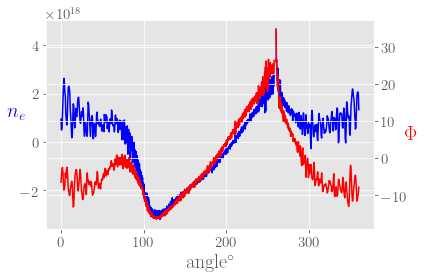

In [14]:
'''Density vs. Potential without m=0'''
fig, ax1 = plt.subplots()
ax1.plot(node_angles[244:],n_eq_m[244:],'b-')
ax1.plot(node_angles[0:244],n_eq_m[0:244],'b-')
ax1.set_xlabel(r'angle$^\circ$')
g = ax1.set_ylabel(r'$n_e$',color='b')
g.set_rotation(0)
ax2 = ax1.twinx()
ax2.plot(node_angles[244:],pot_eq_m[244:],'r-')
ax2.plot(node_angles[0:244],pot_eq_m[0:244],'r-')
h = ax2.set_ylabel(r'$\Phi$',color='r')
h.set_rotation(0)
fig.tight_layout()
plt.show()

In [15]:
'''Removing the n=0,m=0 mode'''
n_ad = n - n_tp[np.newaxis,np.newaxis,:]
pot_ad = pot - pot_tp[np.newaxis,np.newaxis,:]

In [16]:
'''Equilibrium values without the n=0,m=0 mode'''
n_eq = n_ad.mean(axis=1)
n_eq = n_eq.mean(axis=1)
pot_eq = pot_ad.mean(axis=1)
pot_eq = pot_eq.mean(axis=1)

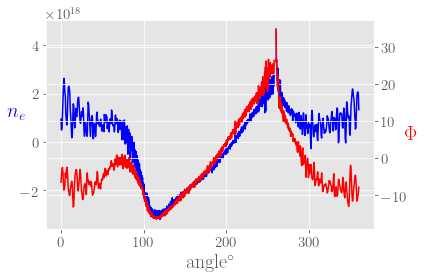

In [17]:
'''Density vs. Potential without the n=0,m=0 mode'''
fig, ax1 = plt.subplots()
ax1.plot(node_angles[244:],n_eq[244:],'b-')
ax1.plot(node_angles[0:244],n_eq[0:244],'b-')
ax1.set_xlabel(r'angle$^\circ$')
g = ax1.set_ylabel(r'$n_e$',color='b')
g.set_rotation(0)
ax2 = ax1.twinx()
ax2.plot(node_angles[244:],pot_eq[244:],'r-')
ax2.plot(node_angles[0:244],pot_eq[0:244],'r-')
h = ax2.set_ylabel(r'$\Phi$',color='r')
h.set_rotation(0)
fig.tight_layout()
plt.show()

C:\Users\giann\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\giann\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


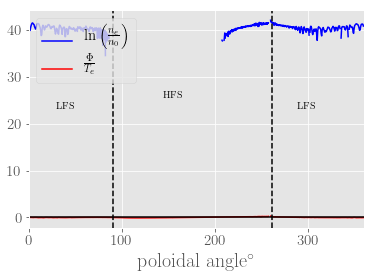

In [18]:
'''Adiabaticity plot without the n=0, m=0 mode.'''
potential_eq = (pot_eq/T_e_avg)
no = 2.45
#plt.figure(figsize=(10,10))
plt.plot(node_angles[244:],np.log(n_eq[244:]/no),'b-',label = r'$\ln\left(\frac{n_e}{n_0}\right)$')
plt.plot(node_angles[0:244],np.log(n_eq[0:244]/no),'b-')
plt.xlabel(r'poloidal angle$^\circ$')
plt.plot(node_angles[244:],potential_eq[244:],'r-',label = r'$\frac{\Phi}{T_e}$')
plt.plot(node_angles[0:244],potential_eq[0:244],'r-')
plt.axvline(x=261,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.4, 0.6),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.8, 0.55),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.08, 0.55),textcoords='axes fraction')
plt.xlim(0,360)
plt.legend(loc=2)
plt.show()

In [44]:
pot_eq/

(1180,)

In [19]:
'''Calculating perturbations.'''
dn = n-n_avg[:,np.newaxis,np.newaxis]
dpot = pot-pot_avg[:,np.newaxis,np.newaxis] 

In [20]:
'''Averaged perturbations.'''
dpot_tor = dpot.mean(axis=1)
dpot_avg = dpot_tor.mean(axis=1)
dn_tor = dn.mean(axis=1)
dn_avg = dn_tor.mean(axis=1)

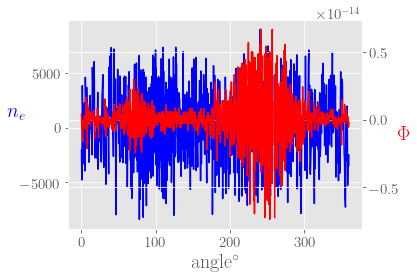

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(node_angles[244:],dn_avg[244:],'b-')
ax1.plot(node_angles[0:244],dn_avg[0:244],'b-')
ax1.set_xlabel(r'angle$^\circ$')
g = ax1.set_ylabel(r'$n_e$',color='b')
g.set_rotation(0)
ax2 = ax1.twinx()
ax2.plot(node_angles[244:],dpot_avg[244:],'r-')
ax2.plot(node_angles[0:244],dpot_avg[0:244],'r-')
h = ax2.set_ylabel(r'$\Phi$',color='r')
h.set_rotation(0)
fig.tight_layout()
plt.show()

C:\Users\giann\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\giann\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\giann\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\giann\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


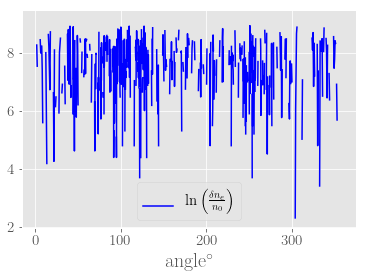

In [22]:
dpotential = dpot_avg/T_e_avg
no = 2.45e19
plt.plot(node_angles[244:],np.log(dn_avg[244:]),'b-',label = r'$\ln\left(\frac{\delta n_e}{n_0}\right)$')
plt.plot(node_angles[0:244],np.log(dn_avg[0:244]),'b-')
plt.xlabel(r'angle$^\circ$')
#plt.plot(node_angles[244:],dpotential[244:],'r-',label = r'$\frac{\delta\Phi}{T_e}$')
#plt.plot(node_angles[0:244],dpotential[0:244],'r-')
plt.legend()
plt.show()

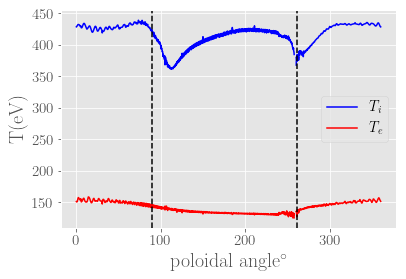

In [23]:
'''Temperatures plot.'''
plt.plot(node_angles[244:],T_i_avg[244:],'b-',label = r'$T_i$')
plt.plot(node_angles[0:244],T_i_avg[0:244],'b-')
plt.plot(node_angles[244:],T_e_avg[244:],'r-',label = r'$T_e$')
plt.plot(node_angles[0:244],T_e_avg[0:244],'r-')
plt.axvline(x=261,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.4, 0.6),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.8, 0.55),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.08, 0.55),textcoords='axes fraction')
plt.xlabel(r'poloidal angle$^\circ$')
plt.ylabel(r'T(eV)')
plt.legend()
plt.show()

In [24]:
#file = open("ti255_temperatures(fig7).txt",'a')
#file.write("Ang."+"\t"+"Ti"+"\t"+"Te"+"\n")
#for i in range(len(node_angles)):
#    file.write(str(node_angles[i])+"\t"+str(T_i_avg[i])+"\t"+str(T_e_avg[i])+"\n")
#file.close()    

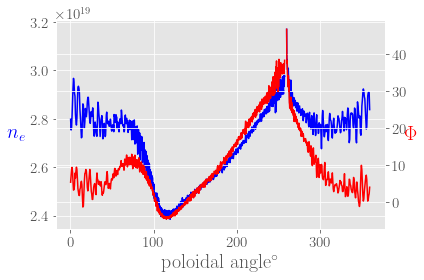

In [25]:
'''N and Phi double plot.'''
fig, ax1 = plt.subplots()
ax1.plot(node_angles[244:],n_avg[244:],'b-')
ax1.plot(node_angles[0:244],n_avg[0:244],'b-')
ax1.set_xlabel(r'poloidal angle$^\circ$')
g = ax1.set_ylabel(r'$n_e$',color='b')
g.set_rotation(0)
ax1.yaxis.set_label_coords(-0.12, 0.4)
ax2 = ax1.twinx()
ax2.plot(node_angles[244:],pot_avg[244:],'r-')
ax2.plot(node_angles[0:244],pot_avg[0:244],'r-')
h = ax2.set_ylabel(r'$\Phi$',color='r')
h.set_rotation(0)
fig.tight_layout()
plt.show()

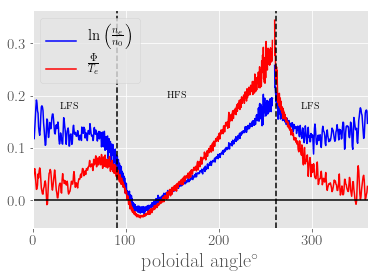

In [26]:
'''Adiabaticity plot.'''
potential = (pot_avg/T_e_avg)
no = 2.45e19
#plt.figure(figsize=(10,10))
plt.plot(node_angles[244:],np.log(n_avg[244:]/no),'b-',label = r'$\ln\left(\frac{n_e}{n_0}\right)$')
plt.plot(node_angles[0:244],np.log(n_avg[0:244]/no),'b-')
plt.xlabel(r'poloidal angle$^\circ$')
plt.plot(node_angles[244:],potential[244:],'r-',label = r'$\frac{\Phi}{T_e}$')
plt.plot(node_angles[0:244],potential[0:244],'r-')
plt.axvline(x=261,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('HFS', xy=(0.03,0.05),xytext=(0.4, 0.6),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.8, 0.55),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.03,0.05),xytext=(0.08, 0.55),textcoords='axes fraction')
plt.xlim(0,360)
plt.legend(loc=2)
plt.show()

In [27]:
file = open("ti255_adiabaticity(fig3).txt",'a')
file.write("Ang."+"\t"+"ln(n/no)"+"\t"+"phi/Te"+"\n")
for i in range(len(node_angles)):
    file.write(str(node_angles[i])+"\t"+str(np.log(n_avg[i]/no))+"\t"+str(potential[i])+"\n")
file.close()    

In [28]:
'''Calculation of the adiabatic relation and interpolation'''
eln = np.log(n_avg[:]/no)
eln = P.angle_interp(node_angles,eln,0,False)
potential = P.angle_interp(node_angles,potential,0,False)

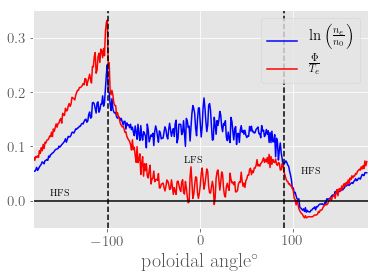

In [29]:
'''Rolled Plot'''
plt.plot([x for x in range(-180,180)],np.roll(eln,180),'b-',label = r'$\ln\left(\frac{n_e}{n_0}\right)$')
plt.xlabel(r'poloidal angle$^\circ$')
plt.plot([x for x in range(-180,180)],np.roll(potential,180),'r-',label = r'$\frac{\Phi}{T_e}$')
plt.axvline(x=-99,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='-')
plt.annotate('LFS', xy=(0.0,0.0),xytext=(0.45, 0.3),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.0,0.0),xytext=(0.8, 0.25),textcoords='axes fraction')
plt.annotate('HFS', xy=(0.0,0.0),xytext=(0.05, 0.15),textcoords='axes fraction')
plt.xlim(-180,180)
plt.legend(loc=1)
plt.show()

In [30]:
pot_avg = P.angle_interp(node_angles,pot_avg,0,False)
T_e_avg = P.angle_interp(node_angles,T_e_avg,0,False)

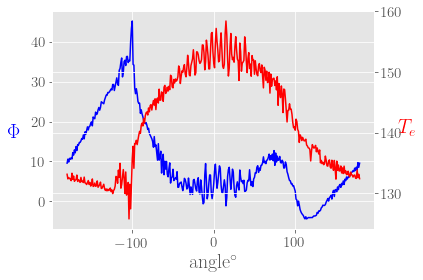

In [33]:
fig, ax1 = plt.subplots()
ax1.plot([x for x in range(-180,180)],np.roll(pot_avg,180),'b-')
ax1.set_xlabel(r'angle$^\circ$')
g = ax1.set_ylabel(r'$\Phi$',color='b')
g.set_rotation(0)
ax1.yaxis.set_label_coords(-0.12, 0.4)
ax2 = ax1.twinx()
ax2.plot([x for x in range(-180,180)],np.roll(T_e_avg,180),'r-')
h = ax2.set_ylabel(r'$T_e$',color='r')
h.set_rotation(0)
fig.tight_layout()
plt.show()